# Eigenvalue problem: Coupled oscillators 

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

\begin{align}
m\ddot{r}_1 &= -k(r_1-r_l-a) -k(r_1-r_2-a)\\
m\ddot{r}_2 &= -k(r_2-r_1-a) -k(r_2-r_3-a)\\
m\ddot{r}_3 &= -k(r_3-r_2-a) -k(r_3-r_r-a)
\end{align}

The constants can be dropped, since we can transform $ (r_1 - a) \rightarrow r_1, (r_2 - 2a) \rightarrow r_2, (r_3 - 3a) \rightarrow r_3, $ and use $r_l=0, r_r=4a$

\begin{align}
m\ddot{r}_1 &= -k(r_1) -k(r_1-r_2)\\
m\ddot{r}_2 &= -k(r_2-r_1) -k(r_2-r_3)\\
m\ddot{r}_3 &= -k(r_3-r_2) -k(r_3)
\end{align}

This is identical to

\begin{align}
\begin{pmatrix}\ddot{r}_1\\\ddot{r}_2\\\ddot{r}_3\end{pmatrix}=-\frac{k}{m}
\begin{pmatrix}2&-1&0\\-1&2&-1\\0&-1&2\end{pmatrix}
\begin{pmatrix}r_1\\ r_2\\ r_3\end{pmatrix}
\end{align}

We can, of course, solve this system of equations numerically. 

## 1. Solving the coupled differential equations numerically 

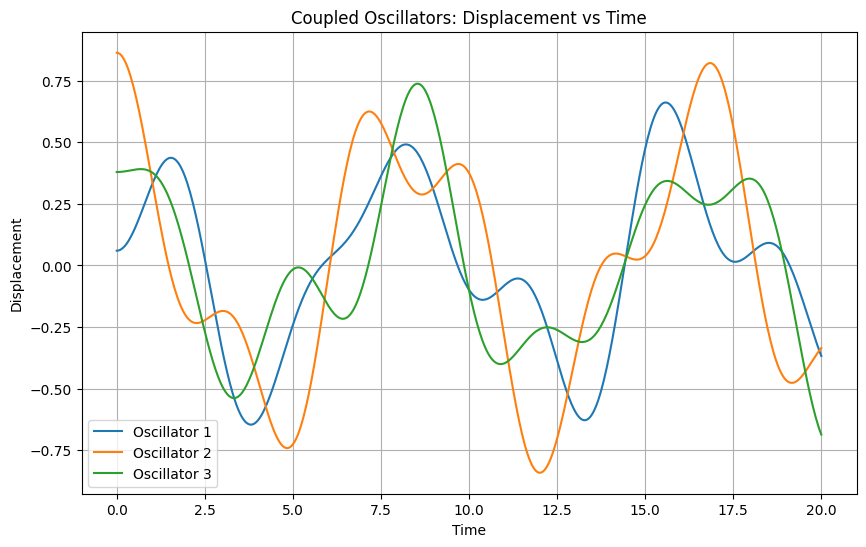

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def coupled_oscillators(t, y, M, K):
    """
    Computes the derivative for the coupled oscillator system.
    
    Args:
    - t (float): Time.
    - y (ndarray): State vector [x; v].
    - M (ndarray): Mass matrix.
    - K (ndarray): Stiffness matrix.
    
    Returns:
    - dydt (ndarray): Time derivative of the state vector.
    """
    N = len(M)
    x = y[:N]  # Position vector
    v = y[N:]  # Velocity vector
    
    # Compute derivatives
    dxdt = v
    dvdt = -np.linalg.solve(M, K @ x)
    
    return np.concatenate([dxdt, dvdt])

def simulate_coupled_oscillators(N, M, K, x0, v0, t_span, t_eval):
    """
    Simulates the coupled oscillator system.
    
    Args:
    - N (int): Number of oscillators.
    - M (ndarray): Mass matrix (N x N).
    - K (ndarray): Stiffness matrix (N x N).
    - x0 (ndarray): Initial positions (N,).
    - v0 (ndarray): Initial velocities (N,).
    - t_span (tuple): Start and end times (t0, tf).
    - t_eval (ndarray): Times at which to store the solution.
    
    Returns:
    - sol (OdeSolution): Solution object from solve_ivp.
    """
    y0 = np.concatenate([x0, v0])  # Initial state [x0, v0]
    sol = solve_ivp(coupled_oscillators, t_span, y0, t_eval=t_eval, args=(M, K), method="RK45")
    return sol

# Example Usage
N = 3  # Number of oscillators
m = 1.0  # Mass of each oscillator
k = 1.0  # Spring constant (between nearest neighbors)

# Mass and stiffness matrices
M = np.eye(N) * m
K = np.zeros((N, N))
for i in range(N):
    K[i, i] = 2 * k  # Diagonal elements
    if i > 0:
        K[i, i - 1] = -k  # Off-diagonal elements
    if i < N - 1:
        K[i, i + 1] = -k

# Initial conditions
x0 = np.random.rand(N)  # Random initial positions
v0 = np.zeros(N)  # Initially at rest

# Time span and evaluation points
t_span = (0, 20)  # Simulate from t=0 to t=20
t_eval = np.linspace(*t_span, 500)  # Evaluate at 500 points

# Simulate the system
solution = simulate_coupled_oscillators(N, M, K, x0, v0, t_span, t_eval)

# Plot results
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(solution.t, solution.y[i, :], label=f'Oscillator {i + 1}')
plt.title("Coupled Oscillators: Displacement vs Time")
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.legend()
plt.grid()
plt.show()


## 2. The eigenvalue problem

### 2.1 Why is it an eigenvalue problem?

The equation for 3 oscillators was 

\begin{align}
\begin{pmatrix}\ddot{r}_1\\\ddot{r}_2\\\ddot{r}_3\end{pmatrix}=-\frac{k}{m}
\begin{pmatrix}2&-1&0\\-1&2&-1\\0&-1&2\end{pmatrix}
\begin{pmatrix}r_1\\ r_2\\ r_3\end{pmatrix}
\end{align}

Solving the system numerically is nice. However, it would be much easier if the matrix would be just a diagonal matrix or even a scalar:

\begin{align}
\begin{pmatrix}\ddot{q}_1\\\ddot{q}_2\\\ddot{q}_3\end{pmatrix}=-\frac{k}{m}
\lambda
\begin{pmatrix}q_1\\ q_2\\ q_3\end{pmatrix}
\end{align}

In this case the solution would be harmonic oscillators with a frequency $ \omega = \sqrt{\frac{k}{m}\lambda}$. 

We must find a unitary matrix $\underline{u}$ with $\underline{u}^{-1}\underline{u} = \underline{u}\,\underline{u}^{-1} = 1$ and $ \underline{u}^{-1}\underline{A}\,\underline{u} = \lambda$ so that

\begin{align} 
\ddot{\vec{r}}&=-\frac{k}{m}\underline{A}\vec{r}\\
\ddot{\vec{r}}&=-\frac{k}{m}\left(\underline{u}\,\underline{u}^{-1}\right)\,\underline{A}\,\left(\underline{u}\,\underline{u}^{-1}\right)\vec{r}\\
\left(\underline{u}^{-1}\ddot{\vec{r}}\right)&=-\frac{k}{m}\left(\underline{u}^{-1}\,\underline{A}\,\underline{u}\right)\,\left(\underline{u}^{-1}\vec{r}\right)\\
\ddot{\vec{q}}&=-\frac{k}{m}\lambda \vec{q}
\end{align}

This means we must find:

\begin{align}
\underline{u}^{-1}\,\underline{A}\,\underline{u} &= \lambda\\
\underline{A}\,\underline{u} &= \lambda\underline{u}
\end{align}

or

\begin{align}
\underline{u}^{-1}\,\underline{A}\,\underline{u}\vec{r} &= \lambda\vec{r}\\
\underline{A}\,\underline{u}\vec{r} &= \lambda\underline{u}\vec{r}\\
\end{align}

In other words, we must find the eigenvalues and eigenvectors of $ \underline{A} $.

### a) Calculate the eigenvalues using a numpy routine

We want to determine the eigenvalues of the matrix

\begin{align}
\underline{A} = \begin{pmatrix}2&-1&0\\-1&2&-1\\0&-1&2\end{pmatrix}
\end{align}

In [3]:
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
eigen_values = np.linalg.eig(A)

print(eigen_values.eigenvalues)

print(eigen_values.eigenvectors)


[3.41421356 2.         0.58578644]
[[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  4.05405432e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]


### b) Exercise: Program a routine ourselves

We have to solve the following equation

\begin{align}
0 = \det(\underline{A}-\lambda\underline{1})
\end{align}

In [4]:
def det3(A):
    term1 = A[0,0] * (A[1,1] * A[2,2] - A[1,2] * A[2,1])
    term2 = A[1,0] * (A[0,1] * A[2,2] - A[0,2] * A[2,1])
    term3 = A[2,0] * (A[0,1] * A[1,2] - A[1,2] * A[1,1])
    return term1 - term2 + term3

def characteristic_polynomial(x):
    return det3(A - x*np.identity(3))

def find_root(f, n, x_min, x_max, startstep):
    """Finds the eigenvalues

    Args:
        f (function): Characteristic equation
        n (int): Number of roots
        x_min (float32): Range
        x_max (float32): Range
        startstep (float32): Starting value for step
    """
    x = x_min
    d = startstep
    signA = np.sign(f(x))
    signB = np.sign(f(x))
    root = []
    while len(root) < n:
        while d > 0.00001:
            while signA - signB == 0:
                signA = signB
                x = x + d
                signB = np.sign(f(x))
            ## decrease d whenever the signs change until desired accuracy is acheived
            x = x - d
            signA = np.sign(f(x-d))
            signB = np.sign(f(x))
            d = d * 0.1
            
        ## store x in root
        root.append(x)
        d = startstep
        x = x + d
        signA = np.sign(f(x))
        signB = np.sign(f(x))
    return root



In [5]:
find_root(characteristic_polynomial, 3, 0, 4, 0.01)

[0.5857000000000002, 1.9999000000000013, 3.4141999999999717]

In [6]:
### Power Iteration Method
def power_iteration(A, num_iterations=1000, tolerance=1e-6):
    """
    Find the dominant eigenvalue and eigenvector using the power iteration method.

    Parameters:
    A (numpy.ndarray): Input square matrix.
    num_iterations (int): Maximum number of iterations.
    tolerance (float): Convergence criterion.

    Returns:
    float: Dominant eigenvalue.
    numpy.ndarray: Corresponding eigenvector.
    """
    n = A.shape[0]
    b_k = np.random.rand(n)
    b_k = b_k / np.linalg.norm(b_k)  # Normalize initial vector

    for _ in range(num_iterations):
        # Calculate the matrix-by-vector product
        b_k1 = np.dot(A, b_k)

        # Normalize the resulting vector
        b_k1_norm = np.linalg.norm(b_k1)
        b_k1 = b_k1 / b_k1_norm

        # Check for convergence
        if np.linalg.norm(b_k1 - b_k) < tolerance:
            break

        b_k = b_k1

    # Dominant eigenvalue
    eigenvalue = np.dot(b_k.T, np.dot(A, b_k)) / np.dot(b_k.T, b_k)

    return eigenvalue, b_k

def deflate_matrix(A, eigenvalue, eigenvector):
    """
    Deflate the matrix to remove the contribution of a known eigenvalue and eigenvector.

    Parameters:
    A (numpy.ndarray): Original matrix.
    eigenvalue (float): Known eigenvalue.
    eigenvector (numpy.ndarray): Corresponding eigenvector.

    Returns:
    numpy.ndarray: Deflated matrix.
    """
    outer_product = np.outer(eigenvector, eigenvector)
    return A - eigenvalue * outer_product

def find_all_eigenvalues_and_eigenvectors(A, num_eigenvalues=None, num_iterations=1000, tolerance=1e-6):
    """
    Find all eigenvalues and eigenvectors of a matrix using power iteration and deflation.

    Parameters:
    A (numpy.ndarray): Input square matrix.
    num_eigenvalues (int): Number of eigenvalues to find. Default is all eigenvalues.
    num_iterations (int): Maximum iterations for power iteration.
    tolerance (float): Convergence criterion.

    Returns:
    list: List of eigenvalues.
    list: List of corresponding eigenvectors.
    """
    n = A.shape[0]
    if num_eigenvalues is None:
        num_eigenvalues = n

    eigenvalues = []
    eigenvectors = []
    A_copy = A.copy()

    for _ in range(num_eigenvalues):
        eigenvalue, eigenvector = power_iteration(A_copy, num_iterations, tolerance)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)

        A_copy = deflate_matrix(A_copy, eigenvalue, eigenvector)

    return eigenvalues, eigenvectors

# Example Usage
if __name__ == "__main__":
    # Define a square matrix
    A = np.array([
        [4, 1, 2],
        [1, 3, 0],
        [2, 0, 5]
    ], dtype=float)

    eigenvalues, eigenvectors = find_all_eigenvalues_and_eigenvectors(A)

    print("Eigenvalues:", eigenvalues)
    print("Eigenvectors:")
    for vec in eigenvectors:
        print(vec)


Eigenvalues: [np.float64(6.669079088270243), np.float64(3.4760236029371407), np.float64(1.854897308807272)]
Eigenvectors:
[0.6311797  0.17202806 0.75631907]
[ 0.37435852  0.786436   -0.49129839]
[-0.67931418  0.59323097  0.43198295]


- Applications
1. This method is used when: The characteristic polynomial cannot be solved directly. Numerical approximation of roots is required. It is robust for well-separated roots but may require modifications for closely spaced roots or repeated roots.

\begin{align}
0 &= \det\begin{pmatrix}2-\lambda&-1&0\\-1&2-\lambda&-1\\0&-1&2-\lambda\end{pmatrix}\\
0 &= (2-\lambda)\det\begin{pmatrix}2-\lambda&-1\\-1&2-\lambda\end{pmatrix}-(-1)\det\begin{pmatrix}-1&-1\\0&2-\lambda\end{pmatrix}\\
0 &= (2-\lambda)^3-(2-\lambda)-(2-\lambda)\\
0 &= -\lambda^3 +6\lambda^2 - 12\lambda + 8 -4 +2\lambda
\end{align}

We have to find the roots of a cubic function (characteristic polynomial)

\begin{align}
0 &= -\lambda^3 +6\lambda^2 - 10\lambda + 4
\end{align}

### c) Analyzing the eigensystem

The analytical solutions are:
$ \quad \lambda_1 = 2+\sqrt{2}, \lambda_2 = 2, \quad \lambda_3 = 2-\sqrt{2}$

This leads us to the eigenfrequencies: $ \omega = \sqrt{\frac{k}{m}\lambda}$

\begin{align} 
\omega_1 = \sqrt{\frac{k}{m}}\sqrt{2+\sqrt{2}}, \quad \omega_2 = \sqrt{\frac{k}{m}}\sqrt{2}, \quad \omega_3 = \sqrt{\frac{k}{m}}\sqrt{2-\sqrt{2}}
\end{align}

The eigenvectors are 
\begin{align}
\begin{pmatrix}-\frac{1}{2}\\\frac{1}{\sqrt{2}}\\-\frac{1}{2}\end{pmatrix}\quad\quad
\begin{pmatrix}-\frac{1}{\sqrt{2}}\\0\\\frac{1}{\sqrt{2}}\end{pmatrix}\quad\quad
\begin{pmatrix}\frac{1}{2}\\\frac{1}{\sqrt{2}}\\\frac{1}{2}\end{pmatrix}
\end{align}